# Project - Interacting with an API using Python

### | Importing Libraries |

In [11]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

### | Variable Declarations |

In [12]:
# load the .env file variables
load_dotenv()

# VARIABLES
c_id = os.environ.get("CLIENT_ID")
c_secret = os.environ.get("CLIENT_SECRET")
artist_uri = 'spotify:artist:4vGrte8FDu062Ntj0RsPiZ'
spfy = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spfy.artist_top_tracks(artist_uri)

df_dict = {
    'Name': [],
    'Popularity': [],
    'Duration (Mins)': [], ## Minutes
    'Artist': []
}

### | Data Treatment |

In [13]:
# Code

## Filtering Data to Get Name, Popularity, Duration and Artist Name
for i in results['tracks']:
    df_dict['Name'].append(i['name'])
    df_dict['Popularity'].append(i['popularity'])
 
    if int((i['duration_ms']/60000 % 1) * 60) > 9:
        df_dict['Duration (Mins)'].append(str(int(i['duration_ms']/60000)) + ':' + str(int((i['duration_ms']/60000 % 1) * 60)))
    else:
        df_dict['Duration (Mins)'].append(str(int(i['duration_ms']/60000)) + ':0' + str(int((i['duration_ms']/60000 % 1) * 60)))
          
    df_dict['Artist'].append(i['artists'][0]['name'])

### | DataFrame Creation |

In [8]:
df = pd.DataFrame(df_dict)
df = df.sort_values(by='Duration (Mins)')

### | Scatter Plot Creation |

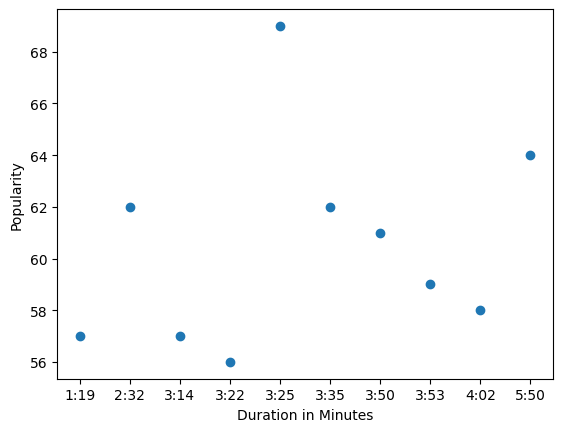

In [14]:
plt.scatter(df['Duration (Mins)'], df['Popularity'])
plt.xlabel('Duration in Minutes')
plt.ylabel('Popularity')

plt.show()

### | Conclusion |

In [15]:
print("After visualizing the data in the plot, I don't see any discernible pattern and certainly no real relation between the Duration of the songs and the popularity level the songs hold in the artist top tracks")

After visualizing the data in the plot, I don't see any discernible pattern and certainly no real relation between the Duration of the songs and the popularity level the songs hold in the artist top tracks
